# Taller 5 - Morfología matemática

# Punto 3 - Operadores de apertura y cierre

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

### 3.0 Inicialización

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle
from skimage.measure import label
from skimage import exposure


### 3.1 Cargado y visualización de la imagen

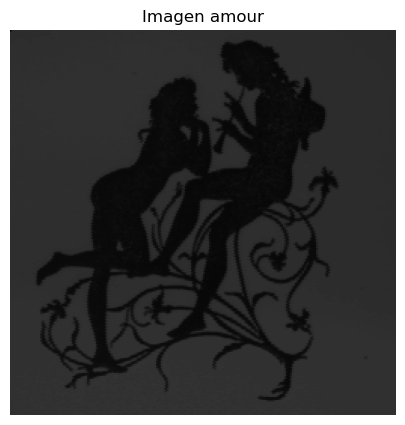

In [3]:
ruta_amour = './images/amour.png'
img_amour = cv2.imread(ruta_amour, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_amour, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen amour')
ax.axis('off')
plt.show()

### 3.2 Operación de apertura usando una mascara cuadrada de 5x5.



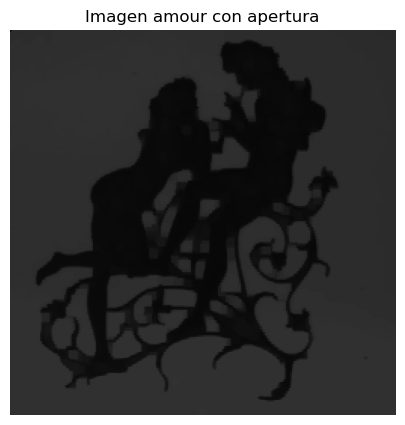

In [4]:
fp = rectangle(5, 5)
opening_img_amour = opening(img_amour, footprint=fp)


fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(opening_img_amour, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen amour con apertura')
ax.axis('off')
plt.show()

**¿Qué partes fueron suprimidas?**

Los detalles más pequeños fueron eliminados, fusionándose con el fondo. Esto incluye texturas finas, ruido y pequeñas estructuras que no pudieron resistir la erosión inicial antes de la dilatación. Como resultado, la imagen luce más limpia y suavizada, conservando solo las estructuras más grandes.

### 3.3 Aplicado de umbralización para binarizar.

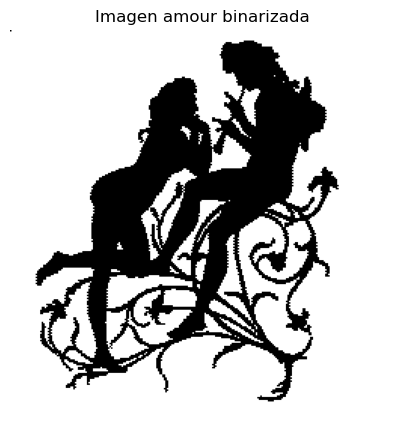

In [7]:
img_amour_bin = cv2.threshold(img_amour, 35, 255, cv2.THRESH_BINARY)[1]

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_amour_bin, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen amour binarizada')
ax.axis('off')
plt.show()

### 3.4 Cierre de la imagen.

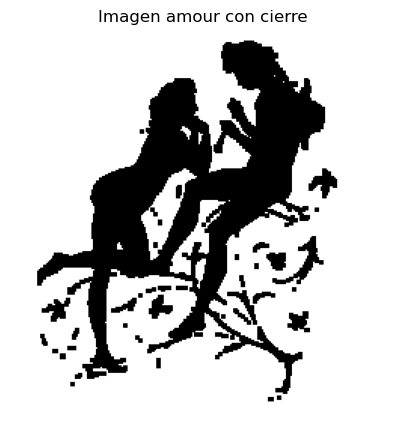

In [17]:
mask_dd = np.full((3, 3), np.nan)
mask_dd[0,2] = 1
mask_dd[1,1] = 1
mask_dd[2,0] = 1

mask_di = np.full((3, 3), np.nan)
mask_di[0,0] = 1
mask_di[1,1] = 1
mask_di[2,2] = 1

mask_h = np.full((1, 3), 1)
mask_v = np.full((3, 1), 1)


closing_image = closing(img_amour_bin, footprint=mask_dd)
closing_image = closing(closing_image, footprint=mask_di)
closing_image = closing(closing_image, footprint=mask_h)
closing_image = closing(closing_image, footprint=mask_v)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(closing_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen amour con cierre')
ax.axis('off')
plt.show()


**¿Cuál es el efecto obtenido?**

El efecto obtenido es la eliminación de los detalles más pequeños sin afectar significativamente la forma o tamaño de los objetos principales.

La figura grande de las dos personas se mantiene intacta, mientras que el arreglo floral detrás de ellas pierde sus detalles más finos. Esto ocurre porque el cierre morfológico tiende a rellenar pequeños huecos y eliminar estructuras delgadas sin modificar la estructura general de los objetos grandes.

### 3.5 Negativo de la imagen resultado

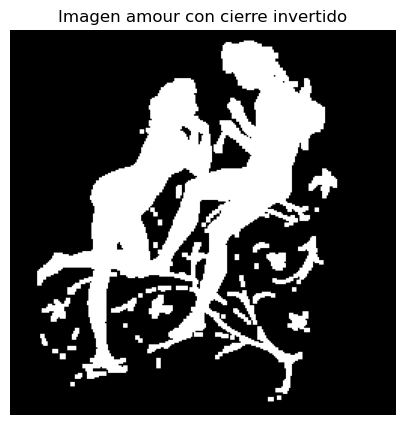

In [28]:
closing_image_inv = cv2.bitwise_not(closing_image)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(closing_image_inv, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen amour con cierre invertido')
ax.axis('off')
plt.show()

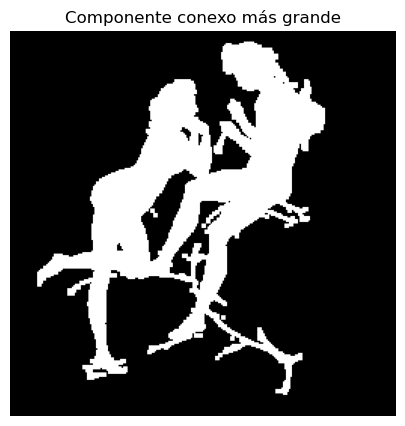

In [36]:
from skimage.measure import regionprops

connected_components = label(closing_image_inv, background=0, connectivity=2)

props = regionprops(connected_components)

largest_component = max(props, key=lambda x: x.area)

largest_component_mask = np.zeros_like(connected_components, dtype=np.uint8)
largest_component_mask[connected_components == largest_component.label] = 255

fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(largest_component_mask, cmap='gray')
ax.set_title('Componente conexo más grande')
ax.axis('off')
plt.show()

**¿Cuál es el resultado?**

El resultado muestra que el componente conexo más grande abarca a las dos personas junto con las ramas más gruesas y cercanas detrás de ellas.

Esto ocurre porque, tras el cierre morfológico, se han rellenado pequeños huecos y eliminado detalles finos, uniendo partes desconectadas de la imagen. Luego, al tomar el negativo, las figuras se volvieron blancas, facilitando la identificación del componente más grande, que conserva la estructura principal sin los detalles más pequeños.